# TASK
- Based on the dataset, find any insight about number of sale of different zone between males and females, member and non-member in this concert.
- Please define the "sale speed" of each zone. Provide the detail about how your group will define the "sale speed" carefully, and be creative !!:
- Use your defined "sale speed' to compare the ticket sale of different zones. find any interesting insight from the result.

In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
!python3 -m pip freeze

anyio==4.0.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
astroid==2.15.8
asttokens==2.4.0
async-lru==2.0.4
attrs==23.1.0
autopep8==2.0.4
Babel==2.13.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.7.22
cffi==1.16.0
charset-normalizer==3.3.1
comm==0.1.4
contourpy==1.1.1
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
dill==0.3.7
docstring-to-markdown==0.13
exceptiongroup==1.1.3
executing==2.0.0
fastjsonschema==2.18.1
flake8==6.1.0
fonttools==4.43.1
fqdn==1.5.1
idna==3.4
importlib-metadata==6.8.0
ipykernel==6.25.2
ipython==8.16.1
ipython-genutils==0.2.0
ipywidgets==8.1.1
isoduration==20.11.0
isort==5.12.0
jedi==0.19.1
Jinja2==3.1.2
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.2
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.8.0
jupyter-lsp==2.2.0
jupyter_client==8.4.0
jupyter_core==5.4.0
jupyter_server==2.9.1
jupyter_server_terminals==0.4.4
jupyterlab==4.0.7
jupyterlab-lsp==5.0.0
jupyt

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

file_name = "girlgeneration.csv"
df = pd.read_csv(file_name, index_col=0)
df.head()

,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,TICKET_BOOTH_RUNNING_NUM,...,SHIPPING_COUNTRY_ID1,SHIPPING_TOWN_ID1,RECEIPT_TITLE,SHIPPING_COUNTRY_ID2,SHIPPING_TOWN_ID2,SHIPPING_ZIP2,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS
SERIAL_ID,,,,,,,,,,,,,,,,,,,,,
331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,41139,...,1,10,NaN,5,61,300.0,26237,0,male,2103
332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,41138,...,1,10,NaN,5,61,300.0,26237,0,male,2103
378,24923,46903,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,39579,...,10,129,NaN,10,129,434.0,24923,0,male,2682
379,24923,46902,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,39580,...,10,129,NaN,10,129,434.0,24923,0,male,2682
586,24930,46919,4,C12101,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:28:56.,2010/10/17,15:00,39596,...,2,14,NaN,2,14,201.0,24930,0,male,718


# Data cleaning

## Delete all columns with the same value

In [3]:
sup_col = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=sup_col)

In [4]:
for column in df.columns:
    print(column)

print(df.shape)

ORDER_ID
TICKET_ITEM_ID
PRINT_TIMES
IDENTITY
CREATE_DATE
TICKET_BOOTH_RUNNING_NUM
PRICE
T_STANDARD_TICKET_TYPE_NAME
SEAT_REGION_NAME
SEAT_ROW
SEAT_NO
TICKET_SHIPPING_RATE_ID
TICKET_FEE
SHIPPING_ZIP1
SHIPPING_COUNTRY_ID1
SHIPPING_TOWN_ID1
RECEIPT_TITLE
SHIPPING_COUNTRY_ID2
SHIPPING_TOWN_ID2
SHIPPING_ZIP2
ORDER_NUM
TICKET_ENTRANCE_NO
SEX
ADDRESS
(7069, 24)


# Task 1
> Based on the dataset, find any insight about number of sale of different zone between males and females, member and non-member in this concert.

## Data cleaning for task 1

In [5]:
df_task1 = df[["T_STANDARD_TICKET_TYPE_NAME","SEAT_REGION_NAME","SEX"]].copy()
df_task1

,T_STANDARD_TICKET_TYPE_NAME,SEAT_REGION_NAME,SEX
SERIAL_ID,,,
331,non-member,Floor3Sectionyellow3I,male
332,non-member,Floor3Sectionyellow3I,male
378,member,Floor3Sectionyellow3C,male
379,member,Floor3Sectionyellow3C,male
586,member,Floor3Sectionyellow3C,male
...,...,...,...
36057,non-member,Floor2Sectionpurple2D,female
36058,non-member,Floor2Sectionpurple2D,female
36059,non-member,Floor3Sectionyellow3H,male


## Floor and Section analyse

In [6]:
region_names = df_task1["SEAT_REGION_NAME"].unique()
region_names.sort()
for region_name in region_names:
    print(region_name)

Floor2Sectionpurple2B
Floor2Sectionpurple2C
Floor2Sectionpurple2D
Floor2Sectionpurple2E
Floor2Sectionred2B
Floor2Sectionred2C
Floor2Sectionred2D
Floor2Sectionred2E
Floor2Sectionyellow2A
Floor2Sectionyellow2B
Floor2Sectionyellow2C
Floor2Sectionyellow2D
Floor2Sectionyellow2E
Floor3Sectionyellow3A
Floor3Sectionyellow3B
Floor3Sectionyellow3C
Floor3Sectionyellow3D
Floor3Sectionyellow3E
Floor3Sectionyellow3F
Floor3Sectionyellow3G
Floor3Sectionyellow3H
Floor3Sectionyellow3I
Floor3Sectionyellow3J
FloorB1FloorSectionA
FloorB1FloorSectionB
FloorB1FloorSectionC
FloorB1FloorSectionD


## Sex analyse

### Sex analyse by floor

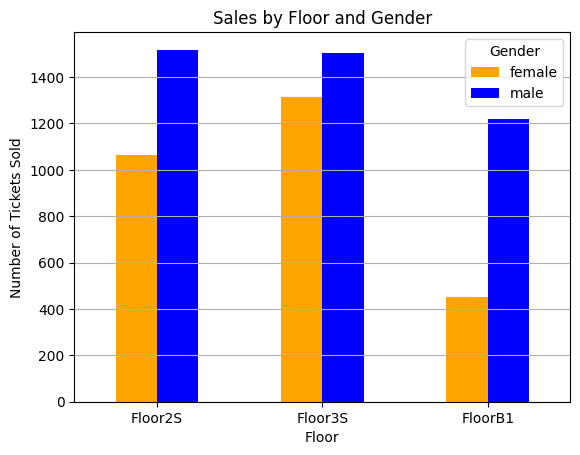

In [7]:
df_sex_by_seat_region = (
    df_task1.groupby(["SEAT_REGION_NAME", "SEX"]).size().reset_index(name="Nombre")
)

df_sex_by_seat_region = df_sex_by_seat_region.pivot(
    index="SEAT_REGION_NAME", columns="SEX", values="Nombre"
)

colors = ["orange", "blue"]     

df_sex_by_floor = df_sex_by_seat_region.copy()

df_sex_by_floor.reset_index(inplace=True)
df_sex_by_floor.rename(columns={"index": "SEAT_REGION_NAME"}, inplace=True)

df_sex_by_floor["Floor"] = df_sex_by_floor["SEAT_REGION_NAME"].str[:7]
df_sex_by_floor = df_sex_by_floor.groupby("Floor").sum()

df_sex_by_floor.plot(kind="bar", ax=plt.gca(), color=colors)
plt.title("Sales by Floor and Gender")
plt.xlabel("Floor")
plt.ylabel("Number of Tickets Sold")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.grid(axis="y")
plt.show()

### Sex analyse by region

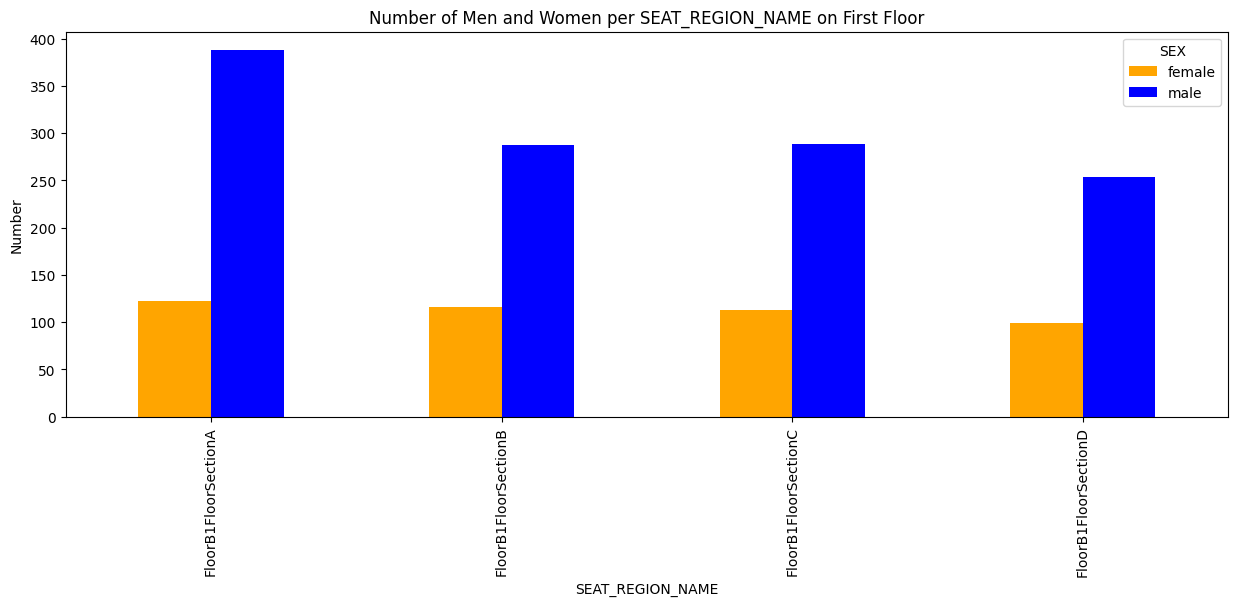

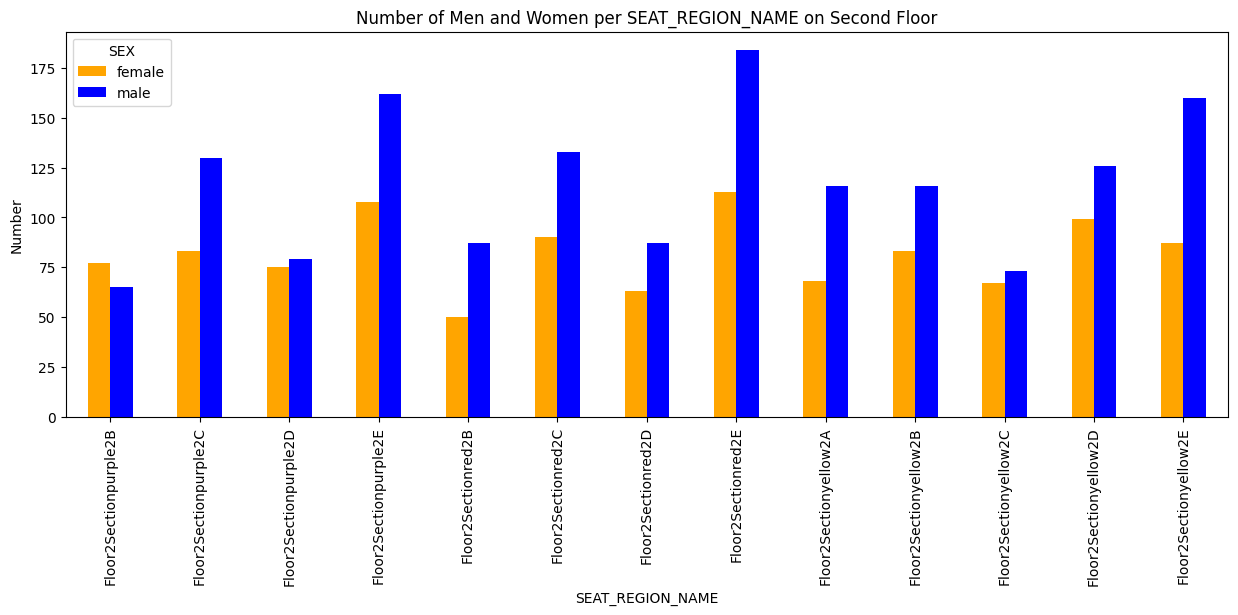

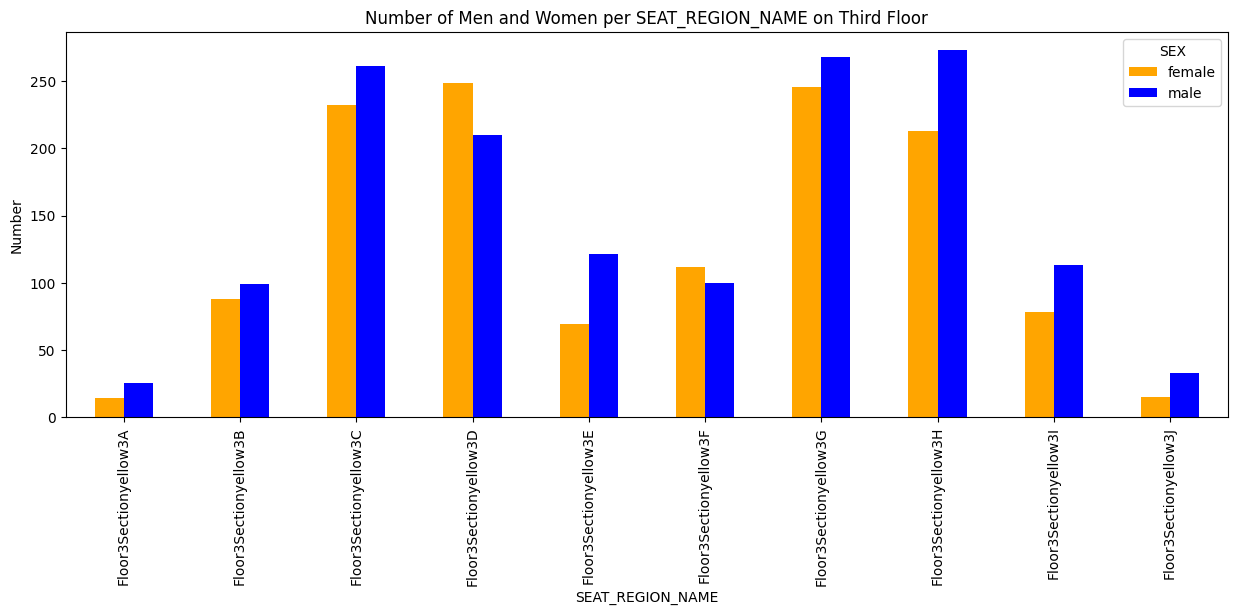

In [8]:
df_sex_on_first_floor = df_sex_by_seat_region[df_sex_by_seat_region.index.str.contains("FloorB1")]
df_sex_on_first_floor.plot(kind="bar", figsize=(15, 5), color=colors)
plt.title("Number of Men and Women per SEAT_REGION_NAME on First Floor")
plt.ylabel("Number")
plt.xlabel("SEAT_REGION_NAME")
plt.show()

df_sex_on_second_floor = df_sex_by_seat_region[df_sex_by_seat_region.index.str.contains("Floor2")]
df_sex_on_second_floor.plot(kind="bar", figsize=(15, 5), color=colors)
plt.title("Number of Men and Women per SEAT_REGION_NAME on Second Floor")
plt.ylabel("Number")
plt.xlabel("SEAT_REGION_NAME")
plt.show()

df_sex_on_third_floor = df_sex_by_seat_region[df_sex_by_seat_region.index.str.contains("Floor3")]
df_sex_on_third_floor.plot(kind="bar", figsize=(15, 5), color=colors)
plt.title("Number of Men and Women per SEAT_REGION_NAME on Third Floor")
plt.ylabel("Number")
plt.xlabel("SEAT_REGION_NAME")
plt.show()

## Membership analyse

### Membership analyse by floor

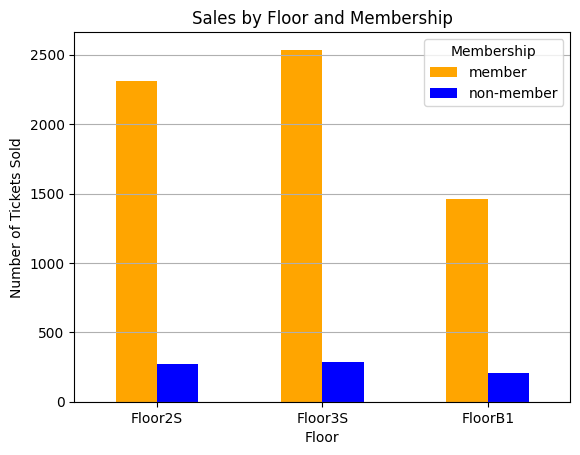

In [9]:
# Grouping by seat region and ticket type, then counting
df_membership_by_seat_region = (
    df_task1.groupby(["SEAT_REGION_NAME", "T_STANDARD_TICKET_TYPE_NAME"])
    .size()
    .reset_index(name="Count")
)
df_membership_by_seat_region = df_membership_by_seat_region.pivot(
    index="SEAT_REGION_NAME", columns="T_STANDARD_TICKET_TYPE_NAME", values="Count"
)

# Defining colors
colors = ["orange", "blue"]

df_membership_by_floor = df_membership_by_seat_region.copy()

df_membership_by_floor.reset_index(inplace=True)
df_membership_by_floor.rename(columns={"index": "SEAT_REGION_NAME"}, inplace=True)

df_membership_by_floor["Floor"] = df_membership_by_floor["SEAT_REGION_NAME"].str[:7]
df_membership_by_floor = df_membership_by_floor.groupby("Floor").sum()

df_membership_by_floor.plot(kind="bar", ax=plt.gca(), color=colors)
plt.title("Sales by Floor and Membership")
plt.xlabel("Floor")
plt.ylabel("Number of Tickets Sold")
plt.xticks(rotation=0)
plt.legend(title="Membership")
plt.grid(axis="y")
plt.show()

### Membership analyse by region

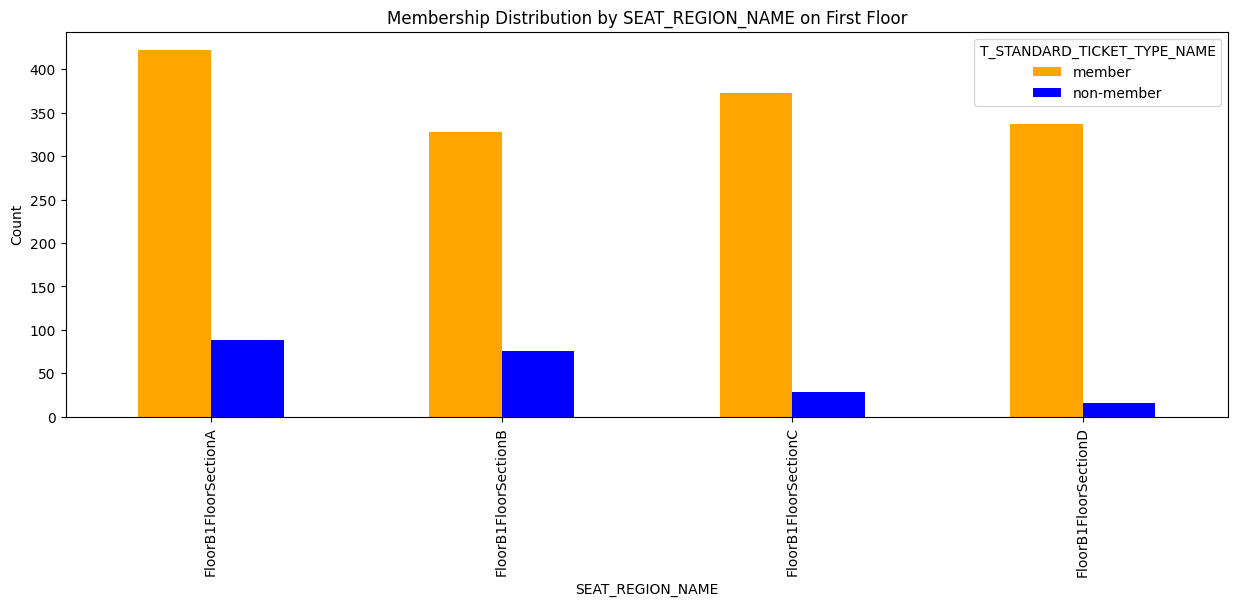

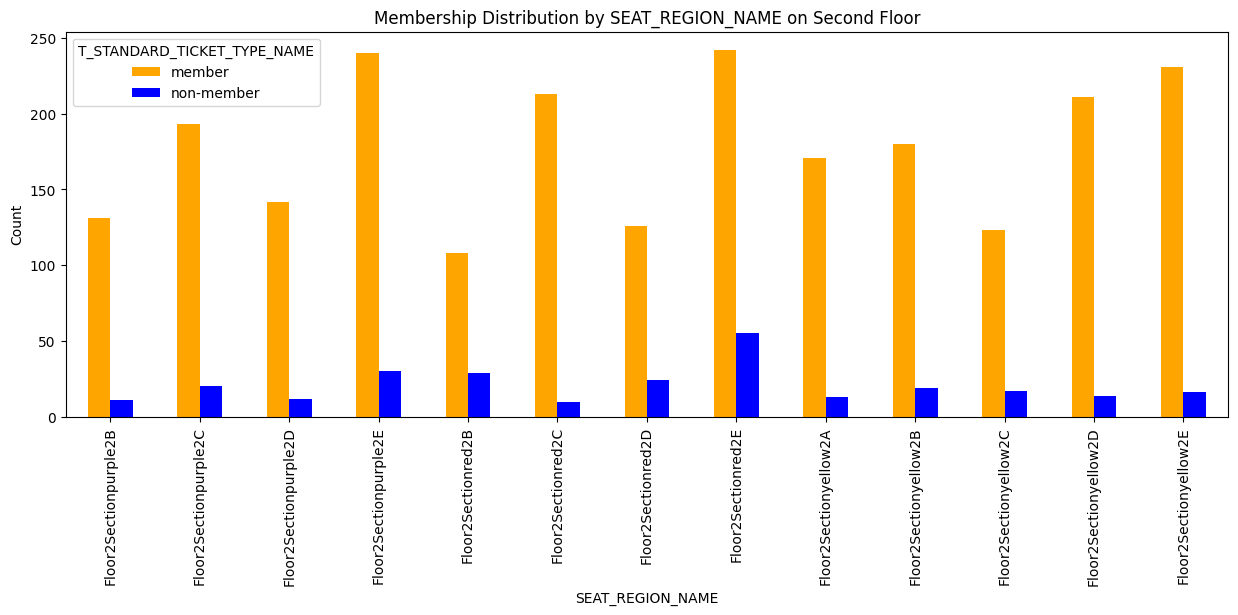

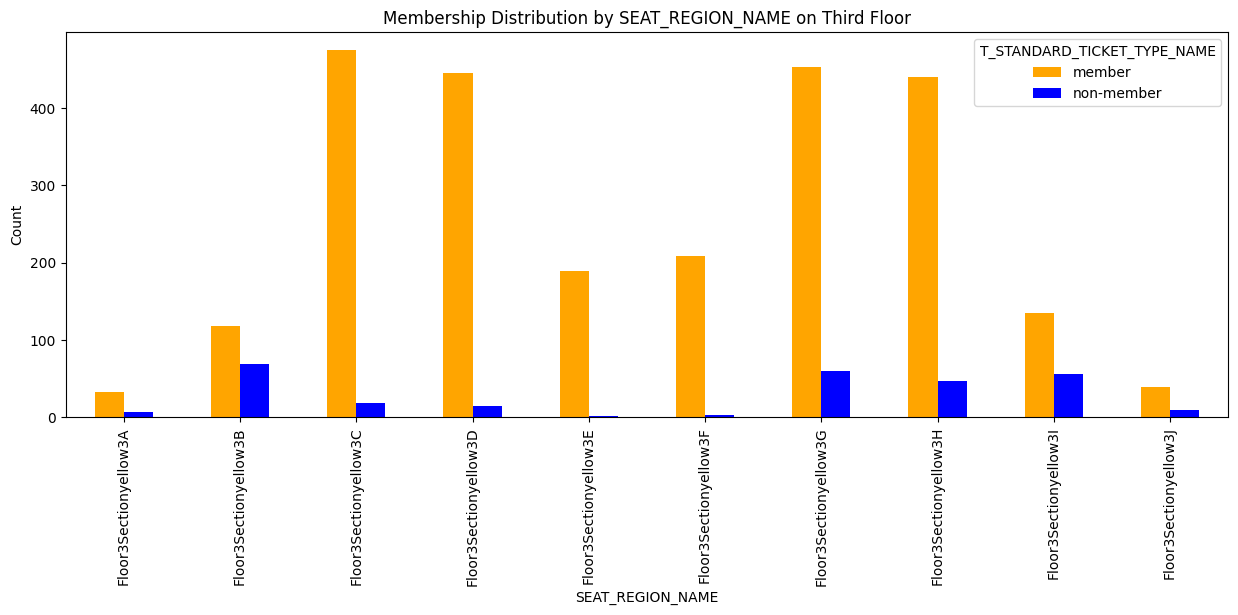

In [10]:
# Defining colors
colors = ["orange", "blue"]  # Orange for one category, Blue for another

# Filtering and plotting for the first floor
df_membership_on_first_floor = df_membership_by_seat_region[df_membership_by_seat_region.index.str.contains("FloorB1")]
df_membership_on_first_floor.plot(kind="bar", figsize=(15, 5), color=colors)
plt.title("Membership Distribution by SEAT_REGION_NAME on First Floor")
plt.ylabel("Count")
plt.xlabel("SEAT_REGION_NAME")
plt.show()

# Filtering and plotting for the second floor
df_membership_on_second_floor = df_membership_by_seat_region[df_membership_by_seat_region.index.str.contains("Floor2")]
df_membership_on_second_floor.plot(kind="bar", figsize=(15, 5), color=colors)
plt.title("Membership Distribution by SEAT_REGION_NAME on Second Floor")
plt.ylabel("Count")
plt.xlabel("SEAT_REGION_NAME")
plt.show()

# Filtering and plotting for the third floor
df_membership_on_third_floor = df_membership_by_seat_region[df_membership_by_seat_region.index.str.contains("Floor3")]
df_membership_on_third_floor.plot(kind="bar", figsize=(15, 5), color=colors)
plt.title("Membership Distribution by SEAT_REGION_NAME on Third Floor")
plt.ylabel("Count")
plt.xlabel("SEAT_REGION_NAME")
plt.show()

# Task 2
> Please define the "sale speed" of each zone. Provide the detail about how your group will define the "sale speed" carefully, and be creative !!
> Use your defined "sale speed' to compare the ticket sale of different zones. find any interesting insight from the result.

## Data cleaning for task 2

In [12]:
df_task2 = df[["CREATE_DATE","SEAT_REGION_NAME"]].copy()
df_task2

,CREATE_DATE,SEAT_REGION_NAME
SERIAL_ID,,
331,2010/10/14 p.m. 11:25:58.,Floor3Sectionyellow3I
332,2010/10/14 p.m. 11:25:58.,Floor3Sectionyellow3I
378,2010/9/18 p.m. 11:26:37.,Floor3Sectionyellow3C
379,2010/9/18 p.m. 11:26:37.,Floor3Sectionyellow3C
586,2010/9/18 p.m. 11:28:56.,Floor3Sectionyellow3C
...,...,...
36057,2010/10/9 p.m. 01:46:11.,Floor2Sectionpurple2D
36058,2010/10/9 p.m. 01:46:11.,Floor2Sectionpurple2D
36059,2010/10/9 p.m. 01:20:40.,Floor3Sectionyellow3H


In [13]:
# Replace "." with empty space in CREATE_DATE and copy data to MY_DATE
df_task2['MY_DATE'] = df_task2.CREATE_DATE.str.replace('.', '', regex=False)

# Apply datetime object with correct format to MY_DATE
df_task2['MY_DATE'] = pd.to_datetime(df_task2['MY_DATE'].str.strip(), format='%Y/%m/%d %p %I:%M:%S')

# Delete CREATE_DATE column
df_task2 = df_task2.drop(columns=['CREATE_DATE'])
df_task2 = df_task2.sort_values('MY_DATE')
df_task2

,SEAT_REGION_NAME,MY_DATE
SERIAL_ID,,
35032,Floor2Sectionyellow2B,2010-09-18 13:18:55
35510,FloorB1FloorSectionA,2010-09-18 13:22:33
35509,FloorB1FloorSectionA,2010-09-18 13:22:33
35508,FloorB1FloorSectionA,2010-09-18 13:22:33
35511,FloorB1FloorSectionA,2010-09-18 13:22:33
...,...,...
35962,FloorB1FloorSectionA,2010-10-14 23:37:17
22143,Floor3Sectionyellow3B,2010-10-14 23:45:15
22142,Floor3Sectionyellow3B,2010-10-14 23:45:15


## Define analyse function

In [14]:
def analyze_sales_cumulative(dfs, window_size=800):
    """
    This function visualizes the cumulative sales over time for different datasets.

    Parameters:
    dfs (dict): A dictionary of pandas DataFrames. Each DataFrame should have a 'MY_DATE' column representing dates of sales.
    window_size (int): The size of the smoothing window, default is 800.

    The function iterates through each DataFrame in the dictionary, converting the 'MY_DATE' column to datetime,
    sorting by date, and calculating the cumulative sales. It then plots these cumulative sales against dates
    for each DataFrame, providing a clear visualization of how sales accumulate over time for each category.
    """

    # Creating a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(12, 6))

    # Iterating through each DataFrame in the dictionary
    for key, df in dfs.items():
        # Converting 'MY_DATE' column to datetime and sorting
        df['MY_DATE'] = pd.to_datetime(df['MY_DATE'])
        df = df.sort_values('MY_DATE')

        # Creating a column to count sales and calculating cumulative sales
        df['Sales_Count'] = 1
        df['Cumulative_Sales'] = df['Sales_Count'].cumsum()

        # Plotting cumulative sales over time
        ax.plot(df['MY_DATE'], df['Cumulative_Sales'], label=f'Cumulative Sales {key}')

    # Setting up the plot labels, ticks, grid, and legend
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Number of Tickets Sold')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.legend()

    # Setting the title and displaying the plot
    plt.title('Cumulative Sales of Tickets Over Time')
    plt.show()


In [15]:
def analyze_sales_heatmap(dfs, interval='15Min', date_format='%Y-%m-%d %H:%M'):
    """
    Generate and display a heatmap representing sales data over time intervals.

    This function takes a dictionary of pandas DataFrames, where each DataFrame represents sales data.
    The sales data in each DataFrame is grouped by a specified time interval, and a heatmap is generated
    to visualize the number of sales in each time period across different categories.

    Parameters:
    dfs (dict of pd.DataFrame): A dictionary where keys are category labels and values are DataFrames.
                                Each DataFrame should contain a 'MY_DATE' column with date-time entries.
    interval (str, optional): The time interval for grouping sales data. Default is '15Min'.
    date_format (str, optional): The format for displaying dates on the heatmap. Default is '%Y-%m-%d %H:%M'.

    The function iterates through each DataFrame, groups the sales data by the specified time interval,
    and aggregates the count of sales. These counts are then used to create a heatmap, with time intervals
    as columns and categories as rows. The color intensity in each cell of the heatmap represents the 
    number of sales in that category and time period.

    Note:
    - Requires pandas, matplotlib, and seaborn libraries.
    - The time intervals and categories are displayed along the x-axis and y-axis of the heatmap, respectively.

    Example:
    >>> dfs = {'Category1': df1, 'Category2': df2}
    >>> analyze_sales_heatmap(dfs, interval='30Min', date_format='%H:%M')
    # This will display a heatmap for the provided dataframes df1 and df2, with 30-minute intervals.
    """

    fig, ax = plt.subplots(figsize=(10, 3))

    # Creating a DataFrame to store aggregated data
    aggregated_data = []

    for key, df in dfs.items():
        df['MY_DATE'] = pd.to_datetime(df['MY_DATE'])
        df = df.sort_values('MY_DATE')

        # Grouping sales by the specified interval
        grouped = df.groupby(pd.Grouper(key='MY_DATE', freq=interval)).size()

        # Adding a column for the label (key)
        grouped = grouped.reset_index(name='Sales_Count')
        grouped['Label'] = key

        # Storing the results in the list
        aggregated_data.append(grouped)

    # Concatenating all aggregated data
    all_data = pd.concat(aggregated_data)

    # Pivoting the data for the heatmap
    pivot_data = all_data.pivot_table(index='Label', columns='MY_DATE', values='Sales_Count', fill_value=0)

    # Formatting the dates for display
    pivot_data.columns = pivot_data.columns.strftime(date_format)

    # Creating and displaying the heatmap
    sns.heatmap(pivot_data, ax=ax, cmap="YlGnBu")
    ax.set_xlabel('Time Interval {interval}'.format(interval=interval))
    ax.set_ylabel('Seat Region')
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.title('Sales Heatmap by Time Interval')
    plt.show()

## Analyse

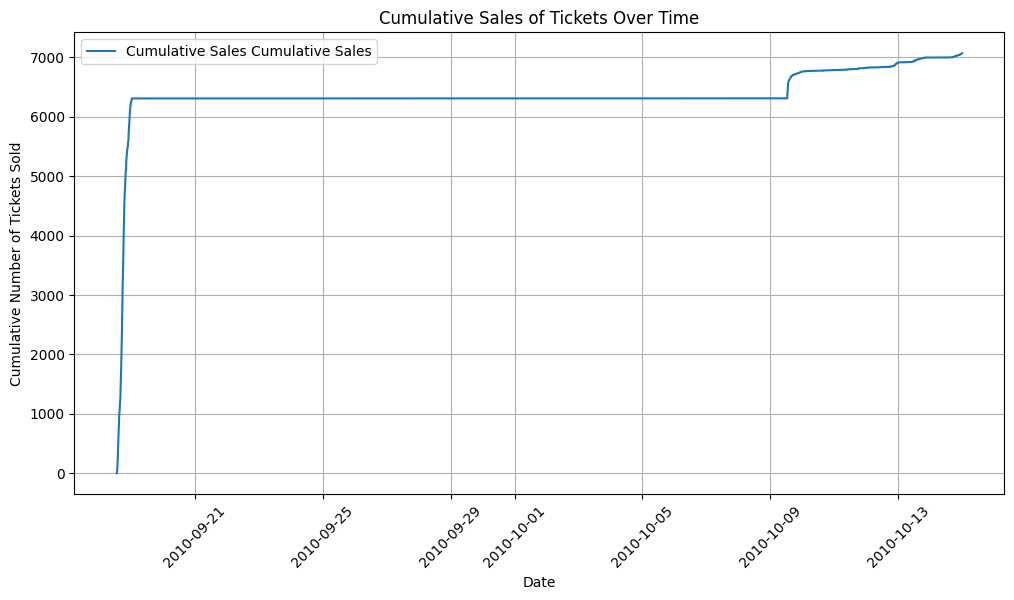

In [16]:
analyze_sales_cumulative({"Cumulative Sales":df_task2}, 2)

In [17]:
member_presale = df_task2[df_task2['MY_DATE'] < pd.to_datetime('2010-09-22')].sort_values('MY_DATE')
non_member_sale = df_task2[df_task2['MY_DATE'] > pd.to_datetime('2010-10-05')].sort_values('MY_DATE')

### Analyse pre-sale

#### Analyse by floor

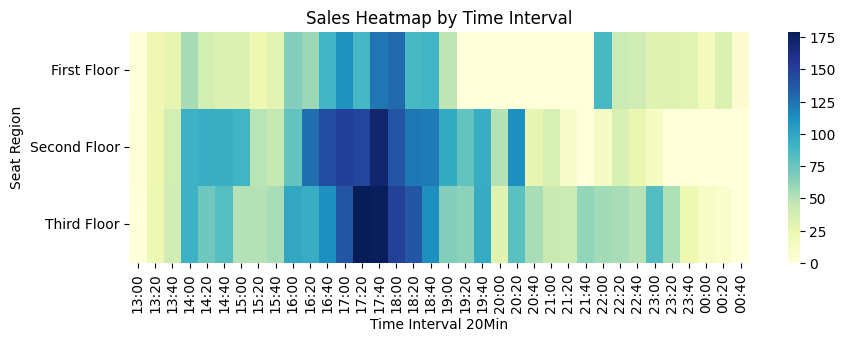

In [18]:
# Extract unique seat region names from member pre-sale data
unique_regions = member_presale['SEAT_REGION_NAME'].unique()

# Initialize a dictionary to store data for each region
regions = {}

# Loop through each unique region and copy their respective data into the regions dictionary
for region in unique_regions:
    regions[region] = member_presale[member_presale['SEAT_REGION_NAME'] == region].copy()
    
# Create dictionaries for specific floor regions using dictionary comprehension
first_floor_region = {key: value for key, value in regions.items() if "FloorB1" in key}
second_floor_region = {key: value for key, value in regions.items() if "Floor2" in key}
third_floor_region = {key: value for key, value in regions.items() if "Floor3" in key}

# Concatenate the data for each floor region into separate DataFrames
first_floor = pd.concat(first_floor_region.values())
second_floor = pd.concat(second_floor_region.values())
third_floor = pd.concat(third_floor_region.values())

# Create a dictionary to hold the data for all floors
global_analyse = {"First Floor": first_floor, "Second Floor": second_floor, "Third Floor": third_floor}

# Set parameters
interval = "20Min"  
date_format = '%H:%M'

analyze_sales_heatmap(global_analyse,interval=interval, date_format=date_format)

#### Analyse by region on each floor

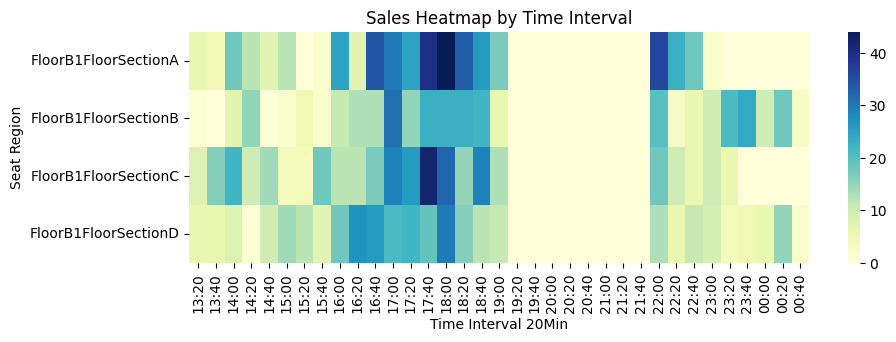

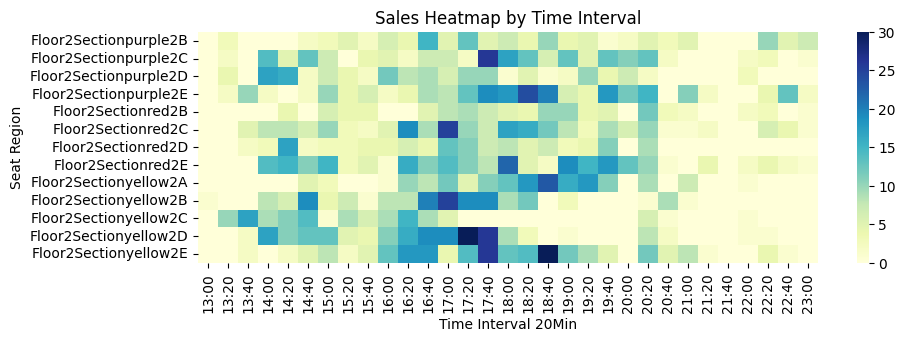

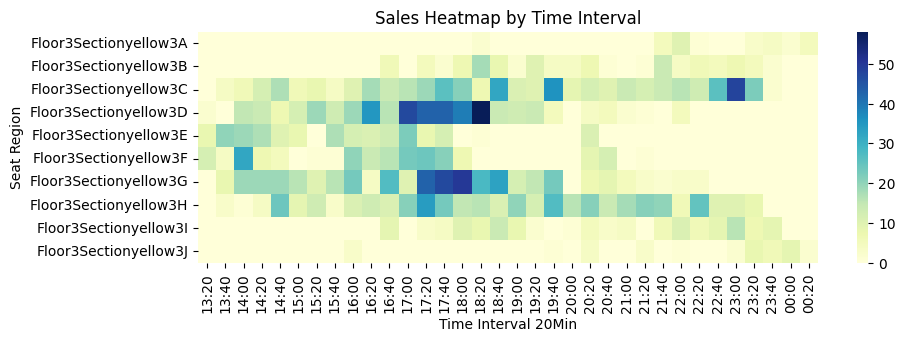

In [19]:
# Extract unique seat region names
unique_regions = member_presale['SEAT_REGION_NAME'].unique()

# Initialize a dictionary to store data for each region
regions = {}

# Loop through each unique region and copy their respective data into the regions dictionary
for region in unique_regions:
    regions[region] = member_presale[member_presale['SEAT_REGION_NAME'] == region].copy()
    
# Filter and create dictionaries for specific floor regions
first_floor_region = {key: value for key, value in regions.items() if "FloorB1" in key}
second_floor_region = {key: value for key, value in regions.items() if "Floor2" in key}
third_floor_region = {key: value for key, value in regions.items() if "Floor3" in key}

# Analyze sales heatmap for each floor region
analyze_sales_heatmap(first_floor_region, interval=interval, date_format=date_format)
analyze_sales_heatmap(second_floor_region, interval=interval, date_format=date_format)
analyze_sales_heatmap(third_floor_region, interval=interval, date_format=date_format)


## Analyse non member sale

#### Analyse by floor

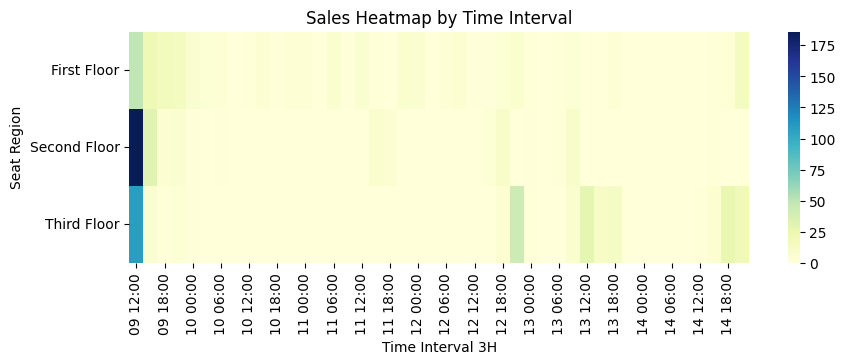

In [20]:
# Extract unique seat region names from the non-member sales data
unique_regions = non_member_sale['SEAT_REGION_NAME'].unique()

# Initialize an empty dictionary to store data by regions
regions = {}

# Populate the regions dictionary with data corresponding to each unique region
for region in unique_regions:
    regions[region] = non_member_sale[non_member_sale['SEAT_REGION_NAME'] == region].copy()
    
# Create dictionaries for specific floor regions using dictionary comprehension
first_floor_region = {key: value for key, value in regions.items() if "FloorB1" in key}
second_floor_region = {key: value for key, value in regions.items() if "Floor2" in key}
third_floor_region = {key: value for key, value in regions.items() if "Floor3" in key}

# Concatenate the data for each floor region into separate DataFrames
first_floor = pd.concat(first_floor_region.values())
second_floor = pd.concat(second_floor_region.values())
third_floor = pd.concat(third_floor_region.values())

# Create a dictionary to hold the data for all floors
global_analyse = {"First Floor": first_floor, "Second Floor": second_floor, "Third Floor": third_floor}

# Set parameters for the heatmap analysis
interval = "3H"
date_format = '%d %H:%M'

# Analyze the sales heatmap for the entire building
analyze_sales_heatmap(global_analyse, interval=interval, date_format=date_format)

#### Analyse by region on each floor

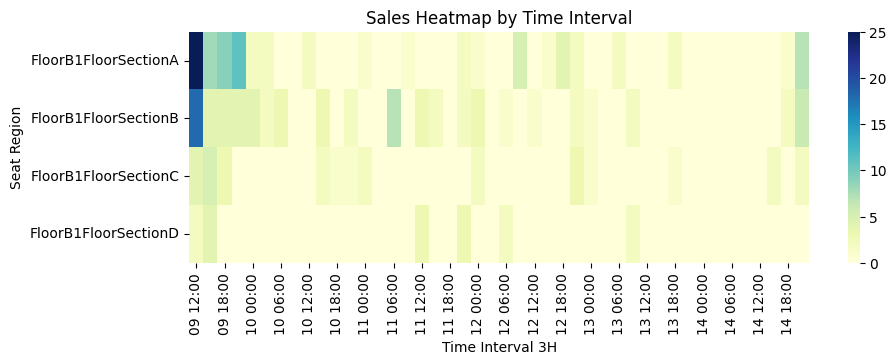

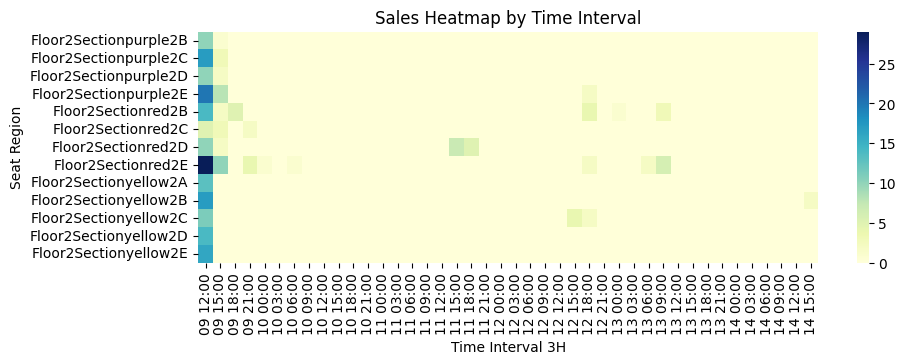

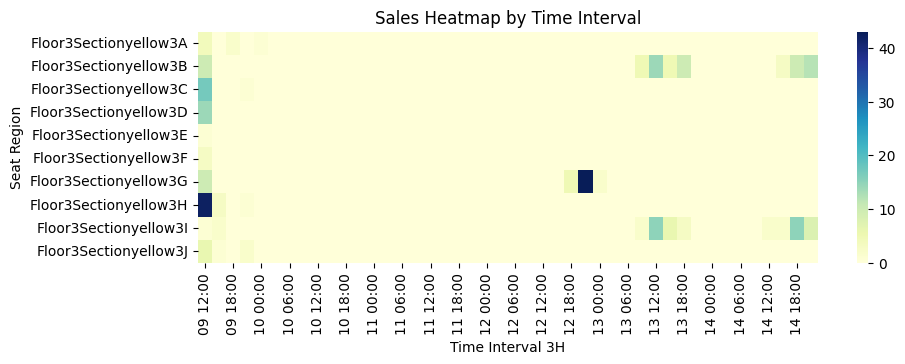

In [21]:
# Extracting unique seat region names from non-member sales data
unique_regions = non_member_sale['SEAT_REGION_NAME'].unique()

# Initializing a dictionary to hold region-specific data
regions = {}

# Looping through each unique region and copying its respective data into the regions dictionary
for region in unique_regions:
    regions[region] = non_member_sale[non_member_sale['SEAT_REGION_NAME'] == region].copy()
    
# Filtering and creating dictionaries for specific floor regions
first_floor_region = {key: value for key, value in regions.items() if "FloorB1" in key}
second_floor_region = {key: value for key, value in regions.items() if "Floor2" in key}
third_floor_region = {key: value for key, value in regions.items() if "Floor3" in key}

# Analyzing sales heatmap for each floor region
analyze_sales_heatmap(first_floor_region, interval=interval, date_format=date_format)
analyze_sales_heatmap(second_floor_region, interval=interval, date_format=date_format)
analyze_sales_heatmap(third_floor_region, interval=interval, date_format=date_format)